# Titanic dataset using Decision Tree Classifier to predict number of Survivors

* Importing libraries to be used for evaluation



In [1]:
# for data wrangling

import pandas as pd
import numpy as np
import statistics

# for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Machine learning modelling

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split        # to split the data into training and validation data
from sklearn.metrics import accuracy_score                  # to check the accuracy of the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
# Importing the dataset

data = pd.read_csv("E:/Data Science/CSV dataset/Titanic.csv")
data

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


# Data Analysis :: 

In [3]:
# getting info of dataset and its column types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


* It has 3 categorial columns and 2 continuous columns

In [4]:
# describing the stats of the dataset

data.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [5]:
# Printing the total NaN values present in the dataset column wise

data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

% OBSERVATIONS %::

  * Only Age column has highest missing values
  * PClass has only one missing value in the dataset which can be filled with 'Mode' value

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Filling Missing Values :

In [6]:
# Checking for unique values and their frequency in the Age column

val_age = data['Age'].value_counts()
val_age

22.00    35
30.00    31
21.00    31
18.00    30
36.00    29
         ..
67.00     1
70.00     1
0.17      1
0.92      1
0.80      1
Name: Age, Length: 75, dtype: int64

* Since different age people are present hence we cannot use 'Mode' value to fill in the column.
* Filling the missing values with the mean value of Ages.

In [7]:
# Calculating mean of Ages

mean_age = round(data['Age'].mean(), 4)
print('Mean value of Age of the travellers is :: ', mean_age)

# Filling mean values in place of missing values using fillna function

data['Age'].fillna(mean_age, inplace = True)

# Printing total NaN present after insertion 

print('\n\nTotal NaN values present in "Age" column after filling with Mean Age value:: ', data['Age'].isnull().sum())

Mean value of Age of the travellers is ::  30.398


Total NaN values present in "Age" column after filling with Mean Age value::  0


In [8]:
# Checking for unique values and their frequency in the PClass column

val_pclass = data['PClass'].value_counts()
val_pclass

3rd    711
1st    322
2nd    279
Name: PClass, dtype: int64

   * Since only one value is missing hence filling that value with 'Mode' which is '3rd Class' here.
  

In [9]:
# Calculating Mode of the column

mode_val = statistics.mode(data['PClass'])
print('Mode of PClass column is :: ', mode_val)

# Filling the missing value with 'Mode' value

data['PClass'].fillna(mode_val, inplace = True)

# Printing total NaN present after insertion 

print('\n\nTotal NaN values present in "PClass" column after filling with Mean Age value:: ', data['PClass'].isnull().sum())

Mode of PClass column is ::  3rd


Total NaN values present in "PClass" column after filling with Mean Age value::  0


In [10]:
# Final check for any missing values in the dataset

data.isnull().sum()

Name        0
PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

* No missing/NaN values hence we can proceed for data visualization

# Data Visualization ::

In [11]:
data

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000185894AC2C8>,
      dtype=object)

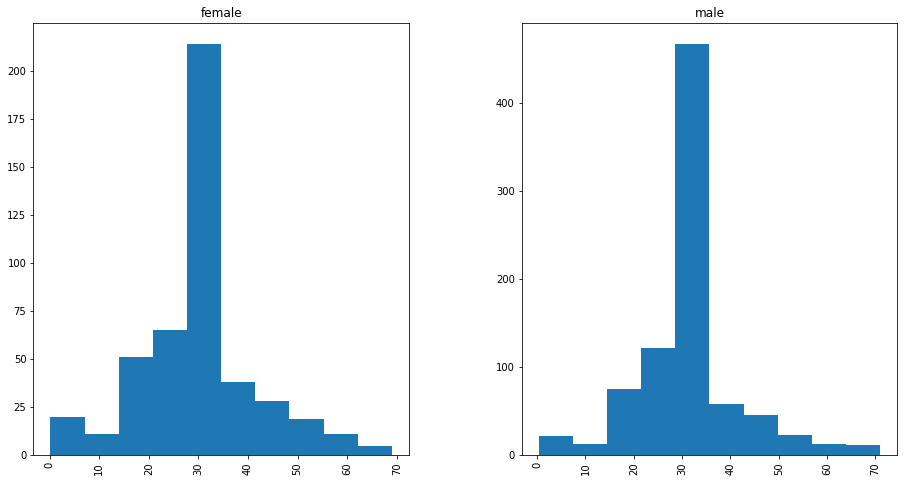

In [12]:
# Plotting the Age of the passengers using hist plot

data.hist(column = 'Age', by = 'Sex', figsize = (15,8), bins = 10)

% Observation % ::

* In both male and female, passenger around 30 yrs of age were present on board


In [13]:
# Making a pivot table to plot the bargraph

table = data.pivot_table(values = 'Age', index = ['PClass', 'Sex'])
table

Age
PClass Sex              
1st    female  35.606406
       male    37.940849
2nd    female  28.007065
       male    29.299651
3rd    female  26.730896
       male    28.652384

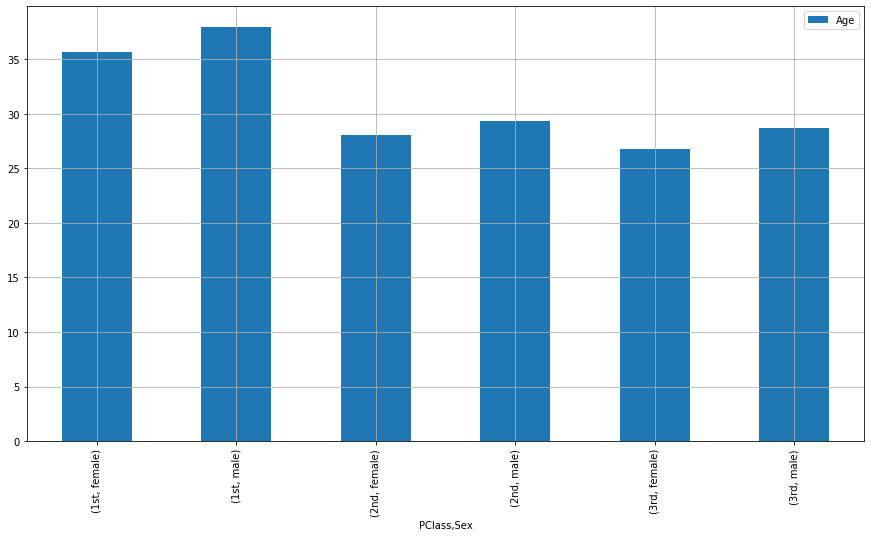

In [14]:
table.plot(kind = 'bar', figsize = (15,8), grid = True)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Making the Model ::

  * First trying to make model using all data
  * Then will try to make model using training and validation data to see which model works better
  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
# Defining our target variable 

Y = data['Survived']

In [16]:
# Defining the predictor variable after some data cleaning

# Since Name column won't be a big factor in deciding the survival rate hence dropping that column in the copy of the dataset
# making a copy of original dataset to use for calculations

copy_data = data.copy()
copy_data

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [17]:
# Dropping Name column

copy_data.drop(['Name'], axis = 1, inplace = True)
copy_data

,PClass,Age,Sex,Survived
0,1st,29.00,female,1
1,1st,2.00,female,0
2,1st,30.00,male,0
3,1st,25.00,female,0
4,1st,0.92,male,1
...,...,...,...,...
1308,3rd,27.00,male,0
1309,3rd,26.00,male,0
1310,3rd,22.00,male,0
1311,3rd,24.00,male,0


* Two categorial columns are present. Hence converting them into float values using get_dummies function.

In [18]:
# Extracting categorial variables and saving it in a variable

col_list = list(copy_data.select_dtypes(include = ['object']))
col_list

['PClass', 'Sex']

In [19]:
# Using get_dummies function and saving the new df in another variable

dummies = pd.get_dummies(copy_data[col_list])
dummies

,PClass_1st,PClass_2nd,PClass_3rd,Sex_female,Sex_male
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,1,0
4,1,0,0,0,1
...,...,...,...,...,...
1308,0,0,1,0,1
1309,0,0,1,0,1
1310,0,0,1,0,1
1311,0,0,1,0,1


In [20]:
# Deleting the original categorial columns from copy datset

copy_data.drop(col_list, axis = 1, inplace = True)
copy_data

,Age,Survived
0,29.00,1
1,2.00,0
2,30.00,0
3,25.00,0
4,0.92,1
...,...,...
1308,27.00,0
1309,26.00,0
1310,22.00,0
1311,24.00,0


In [21]:
# Now concatenating dummies and copy_data df into one for evaluation

#Setting the new df as our predictor variable

final_df = pd.concat([copy_data, dummies], axis = 1)
final_df

,Age,Survived,PClass_1st,PClass_2nd,PClass_3rd,Sex_female,Sex_male
0,29.00,1,1,0,0,1,0
1,2.00,0,1,0,0,1,0
2,30.00,0,1,0,0,0,1
3,25.00,0,1,0,0,1,0
4,0.92,1,1,0,0,0,1
...,...,...,...,...,...,...,...
1308,27.00,0,0,0,1,0,1
1309,26.00,0,0,0,1,0,1
1310,22.00,0,0,0,1,0,1
1311,24.00,0,0,0,1,0,1


In [22]:
# Dropping Survived column from dataset as it is our target varibale and storing the rest in predictor variable

X = final_df.drop(['Survived'], axis = 1)
X

,Age,PClass_1st,PClass_2nd,PClass_3rd,Sex_female,Sex_male
0,29.00,1,0,0,1,0
1,2.00,1,0,0,1,0
2,30.00,1,0,0,0,1
3,25.00,1,0,0,1,0
4,0.92,1,0,0,0,1
...,...,...,...,...,...,...
1308,27.00,0,0,1,0,1
1309,26.00,0,0,1,0,1
1310,22.00,0,0,1,0,1
1311,24.00,0,0,1,0,1


* Since our data is ready. Now proceeding for model making

In [23]:
# defining our model

model = DecisionTreeClassifier(random_state = 1)

# Fitting the data and training our model

model.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [30]:
# Predicting values from our model

pred_val = model.predict(X)
print('Predicted values of our model is :: ')
pred_val

Predicted values of our model is :: 


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# Calculating Mean Square error of our model

mse = round(mean_squared_error(Y, pred_val), 5)
print('Mean Square error value of our Model is :: ',mse)

# Calculating Mean absolute error of our model

mae = round(mean_absolute_error(Y, pred_val), 5)
print('\nMean absolute error value of our Model is :: ',mae)

Mean Square error value of our Model is ::  0.14166

Mean absolute error value of our Model is ::  0.14166


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Making Second Model with training and validation data

In [26]:
# splitting our data into training and validation data

x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state = 1)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((984, 6), (329, 6), (984,), (329,))

In [28]:
model2 = DecisionTreeClassifier(random_state = 101)

# Fitting the data and training our model

model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [29]:
# Predicting values of survival rate

pred_val2 = model2.predict(x_val)
print('Predicted values of our model is :: ')
print(pred_val2)

Predicted values of our model is :: 
[1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0]


In [31]:
# Calculating Mean Square error of our model

mse = round(mean_squared_error(y_val, pred_val2), 5)
print('Mean Square error value of our Model is :: ',mse)

# Calculating Mean absolute error of our model

mae = round(mean_absolute_error(y_val, pred_val2), 5)
print('\nMean absolute error value of our Model is :: ',mae)

Mean Square error value of our Model is ::  0.17933

Mean absolute error value of our Model is ::  0.17933
